In [2]:
# ==========================================================
# DS620 Team Project - AudioMNIST Deep Learning
# Setup and Imports (Jan's Environment)
# ==========================================================

# --- Core Python and OS utilities ---
import os               # for directory and file management
import sys              # for accessing system-level information
import pathlib          # for cross-platform path handling

# --- Numerical and data handling ---
import numpy as np      # numerical operations (arrays, signal processing)
import pandas as pd     # data manipulation and organization

# --- Visualization ---
import matplotlib.pyplot as plt  # visualizations for audio signals and spectrograms

# --- Audio processing ---
import librosa          # audio loading, feature extraction, and transformation
import librosa.display  # visualization support for audio data

# --- Deep learning framework ---
import tensorflow as tf                             # main ML/DL framework
from tensorflow.keras import layers, models         # used for CNN and RNN architectures

In [3]:
# ==========================================================
# Directory Setup (Local Paths)
# ==========================================================

# Define project directories
BASE_DIR = pathlib.Path(r"C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project")
DATA_DIR = BASE_DIR / "data" / "raw"                   # location of raw AudioMNIST files
SPECT_DIR = BASE_DIR / "data" / "spectrograms"         # folder for generated spectrograms
PROC_DIR = BASE_DIR / "data" / "processed"             # folder for processed/feature data
VISUAL_DIR = BASE_DIR / "collab" / "jan" / "visualizations"  # folder for saved visual outputs

# Create directories if they don't exist
for d in [SPECT_DIR, PROC_DIR, VISUAL_DIR]:
    d.mkdir(parents=True, exist_ok=True)

# Verify data directory
if DATA_DIR.exists():
    wav_files = list(DATA_DIR.rglob("*.wav"))
    print(f"✅ Data directory found: {DATA_DIR}")
    print(f"📁 Contains {len(wav_files)} audio files.")
else:
    print(f"⚠️ Data directory not found: {DATA_DIR}")

# Confirm visualization output path
print(f"📊 Visualizations will be saved to: {VISUAL_DIR}")

✅ Data directory found: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw
📁 Contains 30000 audio files.
📊 Visualizations will be saved to: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations


🎵 Selected sample: 1_26_28.wav
📈 Audio loaded | Duration: 0.63s | Sampling Rate: 48000 Hz


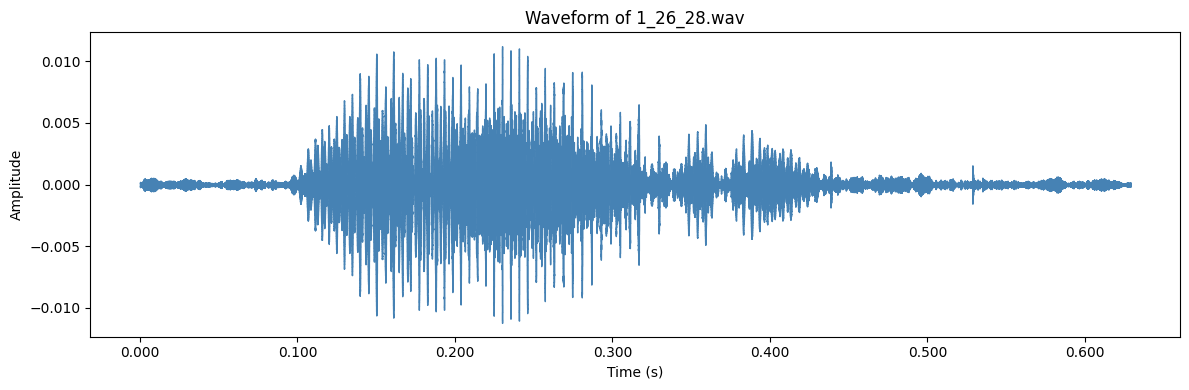

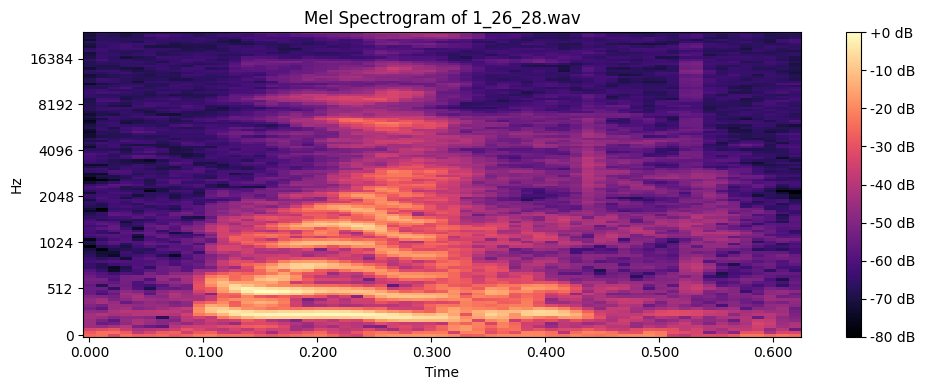

✅ Spectrogram saved to: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\1_26_28_mel_spectrogram.png


In [4]:
# ==========================================================
# Load and Visualize a Sample Audio File
# ==========================================================

import random  # for selecting a random file

# --- Step 1: Randomly select one audio file ---
sample_file = random.choice(wav_files)
print(f"🎵 Selected sample: {sample_file.name}")

# --- Step 2: Load the audio using librosa ---
# sr=None ensures the original sampling rate is preserved
y, sr = librosa.load(sample_file, sr=None)
print(f"📈 Audio loaded | Duration: {librosa.get_duration(y=y, sr=sr):.2f}s | Sampling Rate: {sr} Hz")

# --- Step 3: Plot the waveform ---
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, color='steelblue')
plt.title(f"Waveform of {sample_file.name}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# --- Step 4: Compute the spectrogram (Mel-scaled) ---
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)  # Convert to decibel scale

# --- Step 5: Visualize and save the spectrogram ---
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel Spectrogram of {sample_file.name}")
plt.tight_layout()

# Create save path and export
save_path = VISUAL_DIR / f"{sample_file.stem}_mel_spectrogram.png"
plt.savefig(save_path, dpi=150, bbox_inches='tight')
plt.show()

print(f"✅ Spectrogram saved to: {save_path}")


=== Selected files ===
1. C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\26\9_26_35.wav  |  digit=9, speaker=26, index=35
2. C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\52\5_52_11.wav  |  digit=5, speaker=52, index=11
3. C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\57\2_57_48.wav  |  digit=2, speaker=57, index=48



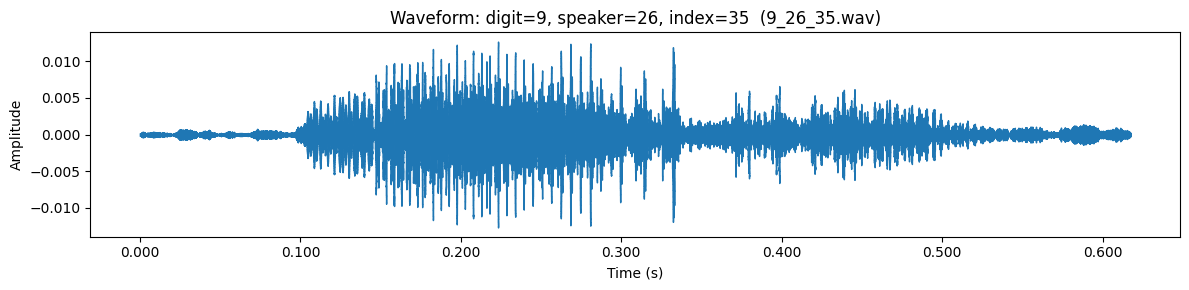

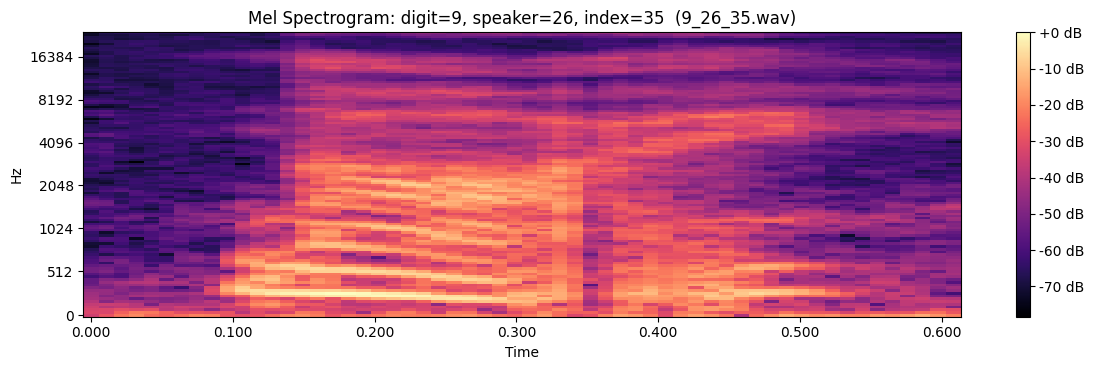

✅ Saved waveform → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\9_26_35_waveform.png
✅ Saved spectrogram → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\9_26_35_mel_spectrogram.png
ℹ️  File: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\26\9_26_35.wav | Duration: 0.62s | SR: 48000 Hz



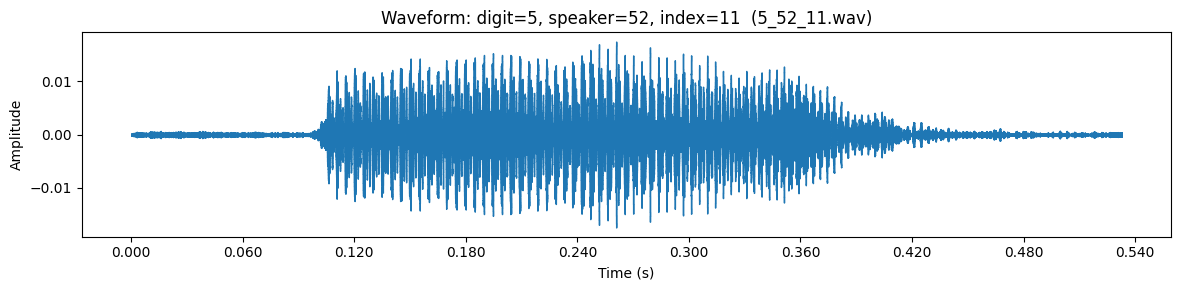

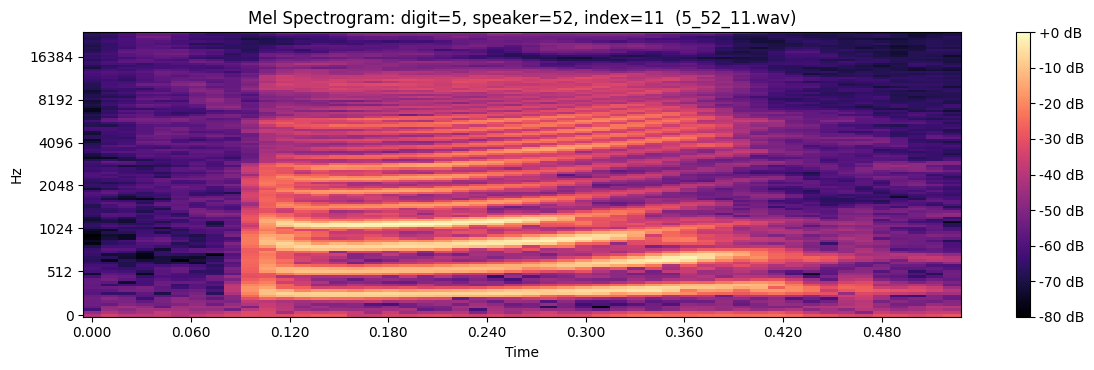

✅ Saved waveform → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\5_52_11_waveform.png
✅ Saved spectrogram → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\5_52_11_mel_spectrogram.png
ℹ️  File: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\52\5_52_11.wav | Duration: 0.53s | SR: 48000 Hz



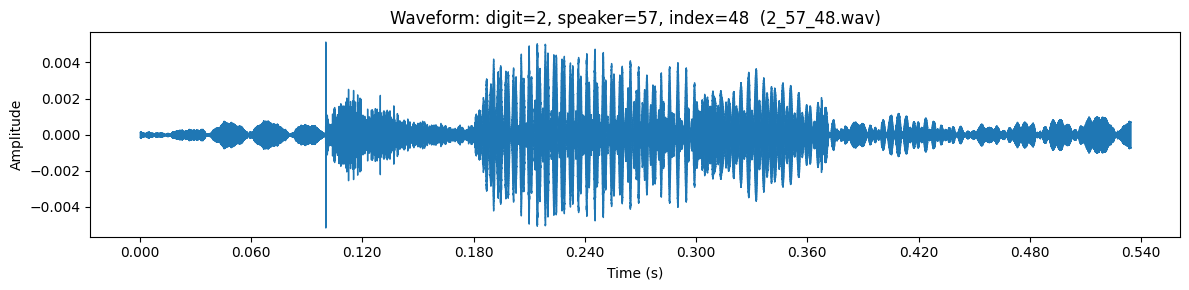

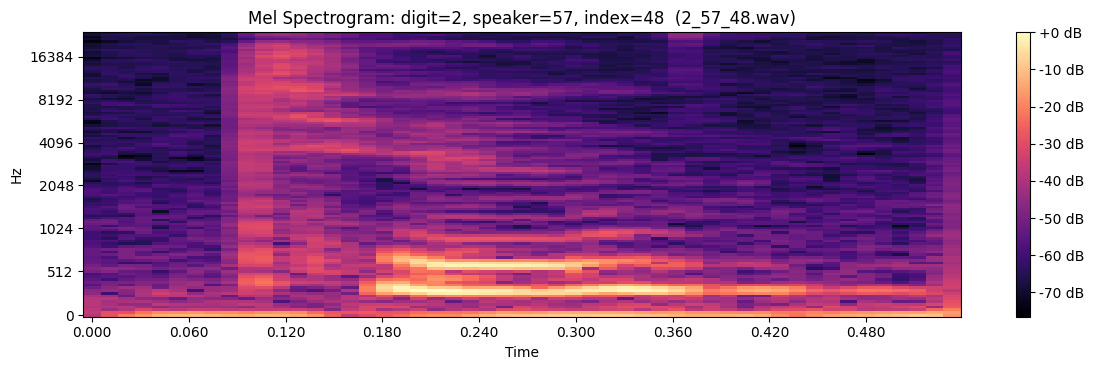

✅ Saved waveform → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\2_57_48_waveform.png
✅ Saved spectrogram → C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\2_57_48_mel_spectrogram.png
ℹ️  File: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\raw\data\57\2_57_48.wav | Duration: 0.53s | SR: 48000 Hz



In [5]:
# ==========================================================
# Visualize & Save Waveform + Mel Spectrogram for 3 Samples
# ==========================================================
import random
from pathlib import Path

# Make a subfolder for these samples to keep things tidy
SAMPLES_DIR = VISUAL_DIR / "samples"
SAMPLES_DIR.mkdir(parents=True, exist_ok=True)

def parse_filename(p: Path):
    """
    Parse filename of form '{digit}_{speakerID}_{index}.wav'
    Returns (digit:int, speaker:str, index:int). Falls back
    gracefully if the pattern is unexpected.
    """
    stem = p.stem  # e.g., '7_14_33'
    parts = stem.split("_")
    digit = parts[0] if len(parts) > 0 else "?"
    speaker = parts[1] if len(parts) > 1 else "?"
    index = parts[2] if len(parts) > 2 else "?"
    # coerce to int when possible
    try: digit = int(digit)
    except: pass
    try: index = int(index)
    except: pass
    return digit, str(speaker), index

# Choose 3 distinct random files from the full list we built earlier
# (wav_files was created in your directory-setup cell via DATA_DIR.rglob("*.wav"))
assert len(wav_files) >= 3, "Need at least 3 audio files to sample."
sample_paths = random.sample(wav_files, 3)

print("=== Selected files ===")
for i, p in enumerate(sample_paths, 1):
    digit, speaker, idx = parse_filename(p)
    print(f"{i}. {p}  |  digit={digit}, speaker={speaker}, index={idx}")
print("======================\n")

for p in sample_paths:
    # -------- Load audio --------
    y, sr = librosa.load(p, sr=None)  # keep native sample rate
    duration = librosa.get_duration(y=y, sr=sr)
    digit, speaker, idx = parse_filename(p)

    # -------- Waveform (plot + save) --------
    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform: digit={digit}, speaker={speaker}, index={idx}  ({p.name})")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    wave_out = SAMPLES_DIR / f"{p.stem}_waveform.png"
    plt.savefig(wave_out, dpi=150, bbox_inches="tight")
    plt.show()

    # -------- Mel Spectrogram (plot + save) --------
    # Mel power spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(12, 3.8))
    librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel", cmap="magma")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Mel Spectrogram: digit={digit}, speaker={speaker}, index={idx}  ({p.name})")
    plt.tight_layout()
    spec_out = SAMPLES_DIR / f"{p.stem}_mel_spectrogram.png"
    plt.savefig(spec_out, dpi=150, bbox_inches="tight")
    plt.show()

    print(f"✅ Saved waveform → {wave_out}")
    print(f"✅ Saved spectrogram → {spec_out}")
    print(f"ℹ️  File: {p} | Duration: {duration:.2f}s | SR: {sr} Hz\n")

In [6]:
# ==========================================================
# Metadata Summary Table for Selected Audio Samples (with Amplitude Stats)
# ==========================================================
import pandas as pd
import numpy as np

metadata_records = []

for p in sample_paths:
    # Load the audio
    y, sr = librosa.load(p, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    digit, speaker, idx = parse_filename(p)

    # Compute amplitude statistics
    amp_min = np.min(y)
    amp_max = np.max(y)
    amp_mean = np.mean(y)
    rms = np.sqrt(np.mean(np.square(y)))  # Root Mean Square energy

    # Build relative path (from project root)
    rel_path = p.relative_to(BASE_DIR)

    # File paths for images (relative for readability)
    waveform_file = Path("collab/jan/visualizations/samples") / f"{p.stem}_waveform.png"
    spectrogram_file = Path("collab/jan/visualizations/samples") / f"{p.stem}_mel_spectrogram.png"

    metadata_records.append({
        "Filename": p.name,
        "Relative Path": str(rel_path),
        "Digit": digit,
        "Speaker": speaker,
        "Index": idx,
        "Duration (s)": round(duration, 3),
        "Sample Rate (Hz)": sr,
        "Amp Min": round(amp_min, 5),
        "Amp Max": round(amp_max, 5),
        "Amp Mean": round(amp_mean, 5),
        "RMS Energy": round(rms, 5),
        "Waveform Image": str(waveform_file),
        "Spectrogram Image": str(spectrogram_file)
    })

# Create DataFrame
metadata_df = pd.DataFrame(metadata_records)

# Display as a clean table
display(
    metadata_df.style.hide(axis="index")
    .set_caption("Metadata Summary of Selected Audio Samples (with Amplitude Statistics)")
)

# Save table to CSV
metadata_csv_path = VISUAL_DIR / "samples" / "audio_metadata_summary.csv"
metadata_df.to_csv(metadata_csv_path, index=False)
print(f"✅ Metadata summary saved to: {metadata_csv_path}")

Filename,Relative Path,Digit,Speaker,Index,Duration (s),Sample Rate (Hz),Amp Min,Amp Max,Amp Mean,RMS Energy,Waveform Image,Spectrogram Image
9_26_35.wav,data\raw\data\26\9_26_35.wav,9,26,35,0.617000,48000,-0.012700,0.011290,-0.000030,0.002450,collab\jan\visualizations\samples\9_26_35_waveform.png,collab\jan\visualizations\samples\9_26_35_mel_spectrogram.png
5_52_11.wav,data\raw\data\52\5_52_11.wav,5,52,11,0.533000,48000,-0.017400,0.015230,-0.000020,0.004260,collab\jan\visualizations\samples\5_52_11_waveform.png,collab\jan\visualizations\samples\5_52_11_mel_spectrogram.png
2_57_48.wav,data\raw\data\57\2_57_48.wav,2,57,48,0.534000,48000,-0.005070,0.005160,-0.000020,0.001160,collab\jan\visualizations\samples\2_57_48_waveform.png,collab\jan\visualizations\samples\2_57_48_mel_spectrogram.png


✅ Metadata summary saved to: C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\collab\jan\visualizations\samples\audio_metadata_summary.csv


In [ ]:
# ==========================================================
# Speaker-safe train/val/test split for AudioMNIST
# ==========================================================
import re
import numpy as np
from pathlib import Path
from sklearn.model_selection import GroupShuffleSplit

# 1) Build file list, labels (digits), and groups (speaker IDs)
all_wavs = sorted([p for p in DATA_DIR.rglob("*.wav")])  # DATA_DIR defined earlier
digits = []
speakers = []

def parse_name(p: Path):
    # Filenames like '{digit}_{speaker}_{index}.wav'
    d, s, *_ = p.stem.split("_")
    return int(d), str(s)

for p in all_wavs:
    d, s = parse_name(p)
    digits.append(d)
    speakers.append(s)

X = np.array(all_wavs)         # file paths
y = np.array(digits)           # labels: 0..9
groups = np.array(speakers)    # group by speaker to prevent leakage

# 2) Group-wise split: train vs temp (val+test), then temp -> val/test
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, temp_idx = next(gss.split(X, y, groups))

X_train, y_train, groups_train = X[train_idx], y[train_idx], groups[train_idx]
X_temp,  y_temp,  groups_temp  = X[temp_idx],  y[temp_idx],  groups[temp_idx]

gss2 = GroupShuffleSplit(n_splits=1, test_size=0.5, random_state=42)  # split temp into val/test 50/50
val_idx, test_idx = next(gss2.split(X_temp, y_temp, groups_temp))

X_val,  y_val  = X_temp[val_idx],  y_temp[val_idx]
X_test, y_test = X_temp[test_idx], y_temp[test_idx]

print(f"Speakers → train: {len(set(groups_train))}, val: {len(set(groups_temp[val_idx]))}, test: {len(set(groups_temp[test_idx]))}")
print(f"Files    → train: {len(X_train)}, val: {len(X_val)}, test: {len(X_test)}")

Speakers → train: 42, val: 9, test: 9
Files    → train: 21000, val: 4500, test: 4500


In [ ]:
# ==========================================================
# Evaluation utilities for multiclass classification
# ==========================================================
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_predictions(y_true, y_pred, class_names=None, title="Confusion Matrix"):
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}\n")
    print("Classification Report (macro avg):")
    print(classification_report(y_true, y_pred, digits=4))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names if class_names else sorted(np.unique(y_true)))
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

In [9]:
# ==========================================================
# Minimal single-file inference (Mel-spectrogram → prediction)
# ==========================================================
import numpy as np
import tensorflow as tf
import librosa

def load_mel(path, sr=None, n_mels=128, fmax=8000, hop_length=512):
    y, sr = librosa.load(path, sr=sr)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax, hop_length=hop_length)
    S_db = librosa.power_to_db(S, ref=np.max)
    # normalize to [0,1] for model input if trained that way
    S_min, S_max = S_db.min(), S_db.max()
    S_norm = (S_db - S_min) / (S_max - S_min + 1e-8)
    return S_norm

def predict_digit(model, wav_path, input_size=(128, 128)):
    mel = load_mel(wav_path)                # (n_mels, time)
    # resize/pad or crop time axis to input_size[1] as needed
    mel_img = tf.image.resize(mel[..., None], input_size).numpy()  # (H,W,1)
    mel_batch = mel_img[None, ...]          # (1,H,W,1)
    probs = model.predict(mel_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    return pred, probs

# Example usage after training:
# model = tf.keras.models.load_model("path/to/saved_model")
# pred, probs = predict_digit(model, some_wav_path)
# print("Pred:", pred, "Probs:", np.round(probs, 3))

In [10]:
import os, random, numpy as np, tensorflow as tf
def set_seed(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed); np.random.seed(seed); tf.random.set_seed(seed)
set_seed(42)

In [ ]:
# ==========================================================
# Feature Extraction: MFCC and Log-Mel Spectrograms
# ==========================================================
import numpy as np
import librosa
import pathlib
from tqdm import tqdm

PROCESSED_DIR = pathlib.Path(BASE_DIR, "data", "processed")
MFCC_DIR = PROCESSED_DIR / "mfcc"
LOGMEL_DIR = PROCESSED_DIR / "logmel"
MFCC_DIR.mkdir(parents=True, exist_ok=True)
LOGMEL_DIR.mkdir(parents=True, exist_ok=True)

def extract_features(wav_path, sr=16000, n_mfcc=13, n_mels=128):
    y, sr = librosa.load(wav_path, sr=sr)

    # MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Log-Mel Spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    logmel = librosa.power_to_db(mel, ref=np.max)

    return mfcc, logmel

# Process a small subset (for testing)
sample_paths = list(DATA_DIR.glob("**/*.wav"))[:100]

for wav_path in tqdm(sample_paths, desc="Extracting features"):
    mfcc, logmel = extract_features(wav_path)

    base_name = wav_path.stem
    np.save(MFCC_DIR / f"{base_name}_mfcc.npy", mfcc)
    np.save(LOGMEL_DIR / f"{base_name}_logmel.npy", logmel)

print(f"✅ Saved MFCCs to {MFCC_DIR}")
print(f"✅ Saved Log-Mel Spectrograms to {LOGMEL_DIR}")

Extracting features: 100%|██████████| 100/100 [00:01<00:00, 81.72it/s]

✅ Saved MFCCs to C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\processed\mfcc
✅ Saved Log-Mel Spectrograms to C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\processed\logmel


In [13]:
# ==========================================================
# Metadata Summary Table
# ==========================================================
import pandas as pd
import librosa

def extract_metadata(wav_paths):
    records = []
    for path in tqdm(wav_paths, desc="Extracting metadata"):
        digit, speaker, index = path.stem.split("_")
        y, sr = librosa.load(path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        records.append({
            "filename": path.name,
            "digit": int(digit),
            "speaker": speaker,
            "duration_sec": round(duration, 3),
            "sample_rate": sr
        })
    return pd.DataFrame(records)

# Small subset for demo (full run later)
wav_paths = list(DATA_DIR.glob("**/*.wav"))[:200]
metadata_df = extract_metadata(wav_paths)

# Display summary
print(metadata_df.head())
print("\nSummary:")
print(metadata_df.describe())

# Save for reference
metadata_df.to_csv(PROCESSED_DIR / "metadata_summary.csv", index=False)
print(f"✅ Metadata saved to {PROCESSED_DIR / 'metadata_summary.csv'}")

Extracting metadata: 100%|██████████| 200/200 [00:00<00:00, 1256.89it/s]

      filename  digit speaker  duration_sec  sample_rate
0   0_01_0.wav      0      01         0.747        48000
1   0_01_1.wav      0      01         0.653        48000
2  0_01_10.wav      0      01         0.650        48000
3  0_01_11.wav      0      01         0.614        48000
4  0_01_12.wav      0      01         0.684        48000

Summary:
           digit  duration_sec  sample_rate
count  200.00000    200.000000        200.0
mean     1.50000      0.585575      48000.0
std      1.12084      0.087914          0.0
min      0.00000      0.383000      48000.0
25%      0.75000      0.520000      48000.0
50%      1.50000      0.576500      48000.0
75%      2.25000      0.646000      48000.0
max      3.00000      0.821000      48000.0
✅ Metadata saved to C:\Users\JanMc\Dropbox\Education\_GitHub_coursework\janmcconnellCityU-coursework\DS620_Team_Project\data\processed\metadata_summary.csv
